In [1]:
#Data was extracted from images taken from genuine and forged banknote-like specimens.
#For digitization, an industrial camera usually used for print inspection was used. 
#The final images have 400x 400 pixels. 
#Due to the object lens and distance to the investigated object, gray-scale pictures with a resolution of about 660 dpi were gained. 
#Wavelet Transform tool was used to extract features from images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()




In [3]:
df = pd.read_csv('/home/q/Desktop/ironhack/data_banknote_authentication.txt', header=None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.columns = ['variance of Wavelet Transformed image (continuous)','skewness of Wavelet Transformed image (continuous)','curtosis of Wavelet Transformed image (continuous)','entropy of image (continuous)','class (integer)']

In [5]:
df

,variance of Wavelet Transformed image (continuous),skewness of Wavelet Transformed image (continuous),curtosis of Wavelet Transformed image (continuous),entropy of image (continuous),class (integer)
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Data exploration

In [6]:
## Used describe function, info, and try to understand  data better.
## Checked correlation of your dataframe using df.corr(). Visualize using heatmap.
#. Checked for outliers. Checked agian using describe function or build boxplots for each column
## Standardization of data if required.

In [7]:
df.isna().sum()

variance of Wavelet Transformed image (continuous)    0
skewness of Wavelet Transformed image (continuous)    0
curtosis of Wavelet Transformed image (continuous)    0
entropy of image (continuous)                         0
class (integer)                                       0
dtype: int64

In [8]:
df.describe()

,variance of Wavelet Transformed image (continuous),skewness of Wavelet Transformed image (continuous),curtosis of Wavelet Transformed image (continuous),entropy of image (continuous),class (integer)
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   variance of Wavelet Transformed image (continuous)  1372 non-null   float64
 1   skewness of Wavelet Transformed image (continuous)  1372 non-null   float64
 2   curtosis of Wavelet Transformed image (continuous)  1372 non-null   float64
 3   entropy of image (continuous)                       1372 non-null   float64
 4   class (integer)                                     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [10]:
df.shape

(1372, 5)

In [11]:
#no null values, and only one column that is an integer

In [12]:
df.corr()

,variance of Wavelet Transformed image (continuous),skewness of Wavelet Transformed image (continuous),curtosis of Wavelet Transformed image (continuous),entropy of image (continuous),class (integer)
variance of Wavelet Transformed image (continuous),1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness of Wavelet Transformed image (continuous),0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis of Wavelet Transformed image (continuous),-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy of image (continuous),0.276817,-0.526321,0.318841,1.000000,-0.023424
class (integer),-0.724843,-0.444688,0.155883,-0.023424,1.000000


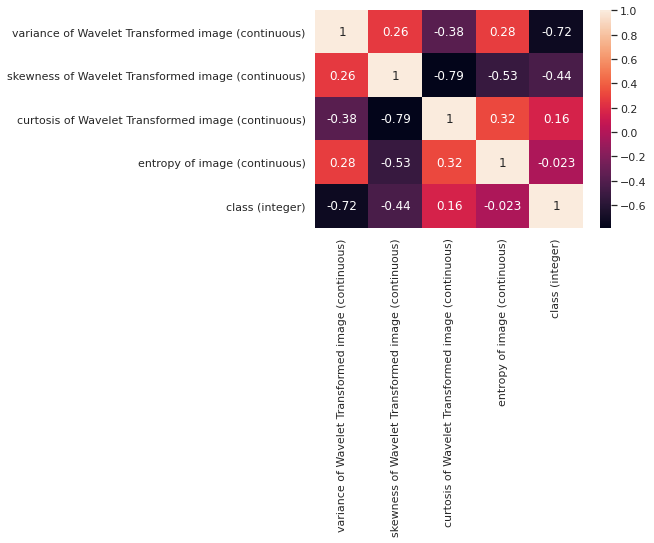

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
#All black values in heatmap are highly negatively correlated.
#Class and variance of Wavelet transformation image
#Curtosis of wavelet transformed image and skewness of image
#Skewness of wavelet transformed image and curtosis of wavelet transformed image
#Class and variance of wavelet transformed image

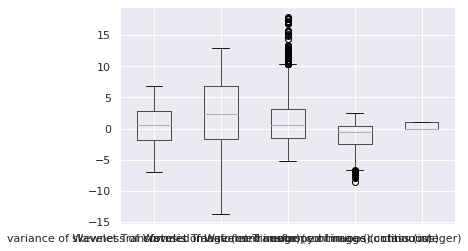

In [15]:
df.boxplot(column=['variance of Wavelet Transformed image (continuous)','skewness of Wavelet Transformed image (continuous)','curtosis of Wavelet Transformed image (continuous)','entropy of image (continuous)','class (integer)'])


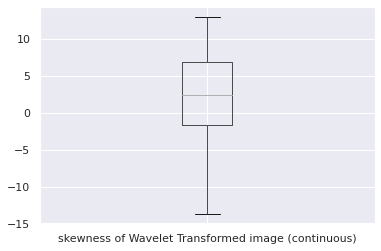

In [16]:
df.boxplot(column=['skewness of Wavelet Transformed image (continuous)'])


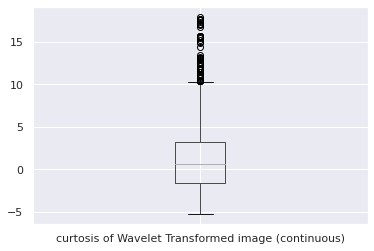

In [17]:
df.boxplot(column=['curtosis of Wavelet Transformed image (continuous)'])
#points are >10

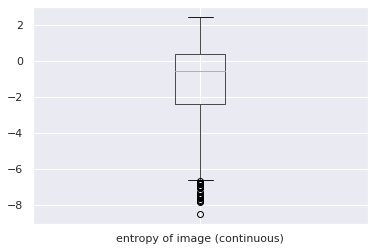

In [18]:
df.boxplot(column=['entropy of image (continuous)'])
#points are <-6

In [19]:
df.columns = ['VOWTI', 'SOWTI', 'COWTI', 'EOI', 'Class']

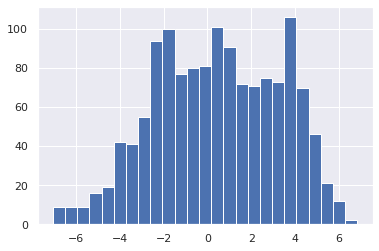

In [20]:
df['VOWTI'].hist(bins=25);

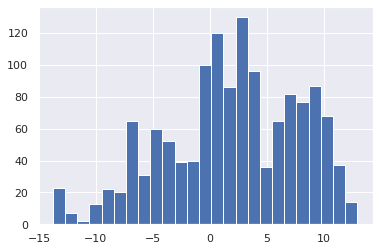

In [21]:
df['SOWTI'].hist(bins=25);


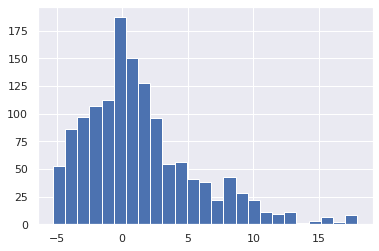

In [22]:
df['COWTI'].hist(bins=25);


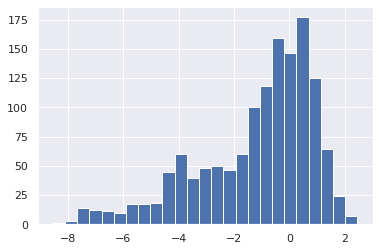

In [23]:
df['EOI'].hist(bins=25);

In [24]:
df

,VOWTI,SOWTI,COWTI,EOI,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Splitting data to Train and Test

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.iloc[:,-5:-1]

In [27]:
y = df.iloc[:,-1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [29]:
X_train

,VOWTI,SOWTI,COWTI,EOI
879,-0.568770,1.4174,-1.42520,-1.12460
783,0.473680,3.3605,-4.50640,-4.04310
605,1.065200,8.3682,-1.40040,-1.65090
1253,-4.553100,-12.5854,15.44170,-1.49830
497,-0.048008,-1.6037,8.47560,0.75558
...,...,...,...,...
1095,1.164000,3.9130,-4.55440,-3.86720
1130,-2.291800,-7.2570,7.95970,0.92110
1294,-7.036400,9.2931,0.16594,-4.53960
860,-3.460500,2.6901,0.16165,-1.02240


In [30]:
y_train

879     1
783     1
605     0
1253    1
497     0
       ..
1095    1
1130    1
1294    1
860     1
1126    1
Name: Class, Length: 960, dtype: int64

In [31]:
X_test

,VOWTI,SOWTI,COWTI,EOI
430,1.569100,6.34650,-0.18280,-2.409900
588,-0.278020,8.18810,-3.13380,-2.527600
296,0.051979,7.05210,-2.05410,-3.150800
184,-1.755900,11.94590,3.09460,-4.897800
244,2.428700,9.38210,-3.24770,-1.454300
...,...,...,...,...
843,-0.526450,-0.24832,-0.45613,0.419380
494,2.569800,-4.40760,5.98560,0.078002
1032,0.163580,-3.35840,1.37490,1.356900
710,2.401200,1.62230,3.03120,0.716790


In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [33]:
# model.predict_proba(X_test).round(2)

In [34]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [35]:
y_test

430     0
588     0
296     0
184     0
244     0
       ..
843     1
494     0
1032    1
710     0
333     0
Name: Class, Length: 412, dtype: int64

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) #tn, fp, fn, tp

array([[226,   3],
       [  2, 181]])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9878640776699029

In [48]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)


0.9890710382513661

In [49]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)


0.9836956521739131

# Model2

In [37]:
from sklearn.neighbors import KNeighborsClassifier
modelknn=KNeighborsClassifier().fit(X_train, y_train)
knnpred= modelknn.predict(X_test)
confusion_matrix(y_test, knnpred) #tn, fp, fn, tp

array([[229,   0],
       [  0, 183]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knnpred)

1.0

In [54]:
from sklearn.metrics import recall_score
recall_score(y_test, knnpred)


1.0

In [55]:
from sklearn.metrics import precision_score
precision_score(y_test, knnpred)

1.0

# Model3



In [38]:
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier().fit(X_train, y_train)

In [39]:
ydectree=dectree.predict(X_test)
confusion_matrix(y_test, ydectree) #tn, fp, fn, tp

array([[228,   1],
       [  6, 177]])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ydectree)

0.9830097087378641

In [52]:
from sklearn.metrics import recall_score
recall_score(y_test, ydectree)

0.9672131147540983

In [53]:
from sklearn.metrics import precision_score
precision_score(y_test, ydectree)

0.9943820224719101

# Model4 

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier().fit(X_train, y_train)

In [41]:
forest=forest.predict(X_test)
confusion_matrix(y_test,forest)

array([[229,   0],
       [  1, 182]])

# Accuracy model

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, forest)

0.9975728155339806

In [50]:
from sklearn.metrics import recall_score
recall_score(y_test, forest)

0.994535519125683

In [51]:
from sklearn.metrics import precision_score
precision_score(y_test, forest)

1.0